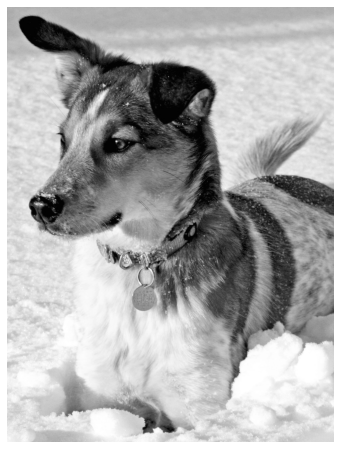

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]


#load dog.jpg
A = imread(r'C:\Users\Danii\Downloads\DATA_PYTHON\DATA\dog.jpg')
D = np.mean(A, -1); # Convert RGB to grayscale


img = plt.imshow(D, cmap = 'gray')
plt.axis('off')
plt.show()

In [2]:
#compute Economy SVD of data
U,Sigma,VT = np.linalg.svd(D,full_matrices=False) 

S = np.diag(Sigma)

In [3]:
#Squared Relative Reconstruction Error of truncated SVD in Frobenius Norm as a function of rank r:

def SqReconstrErr(r):
    Dapprox = U[:,:r-1]@ S[0:r-1, :r-1] @VT[:r-1,:]
    return np.linalg.norm(Dapprox -D, 'fro')**2

#One Minus Reconstruction Error of truncated SVD in Frobenius Norm as a function of rank r:
def OneMinusReconstrErr(r):
    Dapprox = U[:,:r-1]@ S[0:r-1, :r-1] @VT[:r-1,:]
    return 1-np.linalg.norm(Dapprox -D, 'fro')

#plot squared error and one minus error.
y = []
y1 = []
r = np.arange(1,1501,1)
for i in r:
    y.append(SqReconstrErr(i))
    y1.append(OneMinusReconstrErr(i))

Text(0.5, 1.0, 'fraction of missing variance as a function of r')

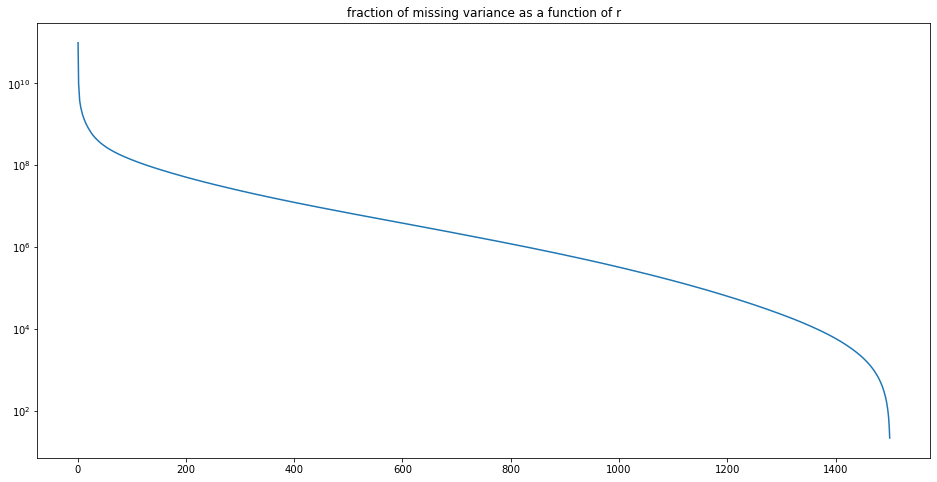

In [4]:
plt.plot(r, y)
plt.yscale("log")
plt.title('fraction of missing variance as a function of r')

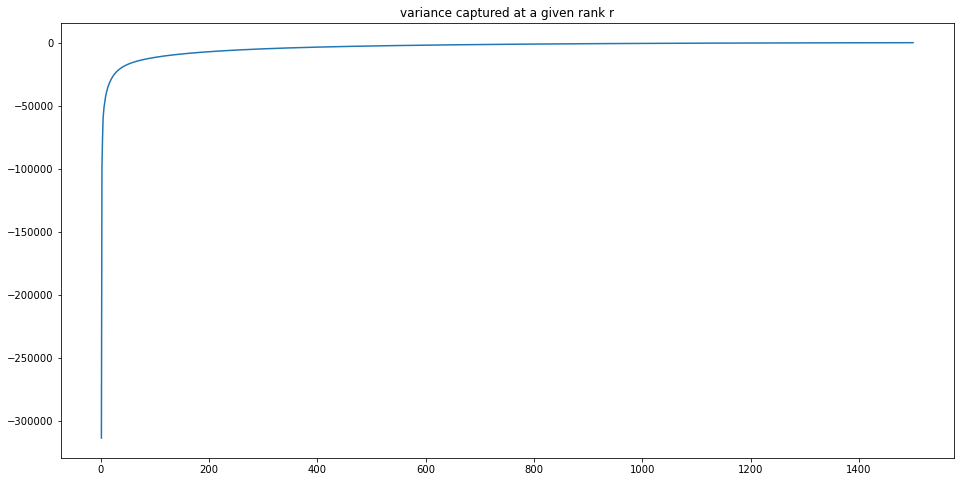

In [6]:
#plot one minus error
plt.plot(r, y1)
plt.title('variance captured at a given rank r')
plt.show()

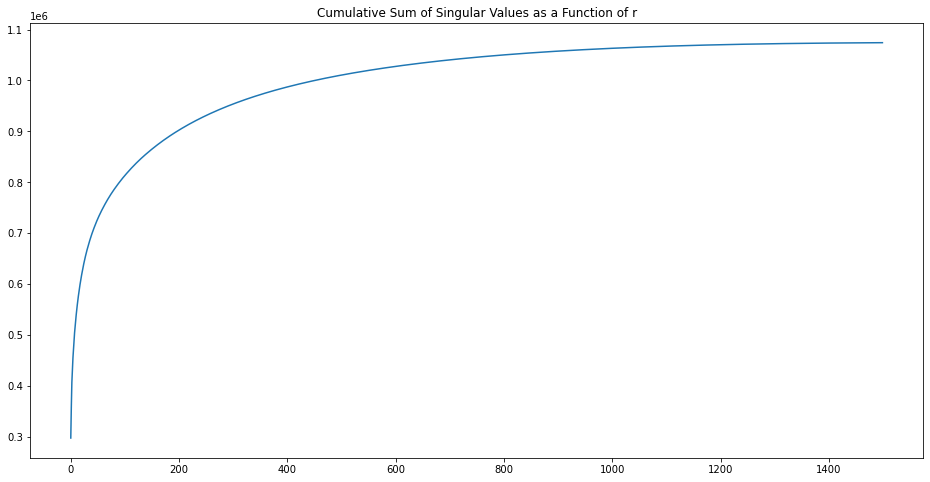

In [7]:
plt.plot(np.cumsum(Sigma))
plt.title('Cumulative Sum of Singular Values as a Function of r')
plt.show()

In [9]:
#find rank (varRank99) where reconstruction captures 99% of total variance

index = 0
t = np.cumsum(y)/sum(y)
while (t[index] < 0.99):
    index = index+1

varRank99 = index +1

In [10]:
varRank99

423

In [11]:
#find rank (frobRank99) where reconstruction captures 99% in the Frobenius norm

index = 0
t = np.sqrt(y)/np.linalg.norm(D, 'fro')
while (t[index] > 0.01):
    index = index+1

frobRank99 = index+1

In [12]:
frobRank99

438

In [13]:
#find rank (sumRank99) that captures 99% of the cumulative sum of singular values

index = 0
t = np.cumsum(Sigma)/np.sum(Sigma)
while (t[index] < 0.99):
    index = index+1

sumRank99 = index+1

In [14]:
sumRank99

1007

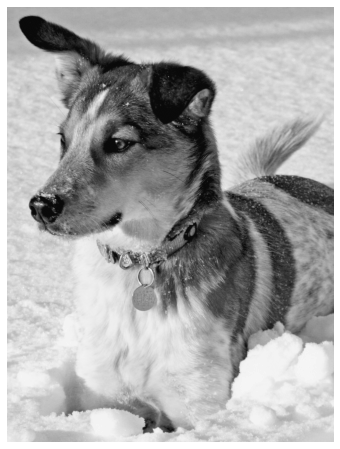

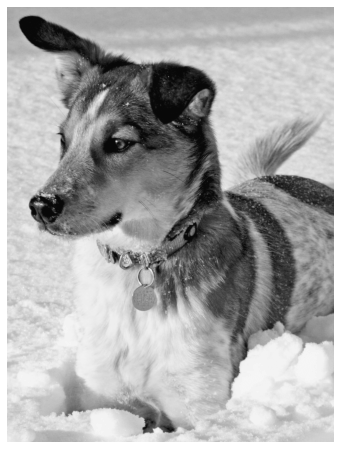

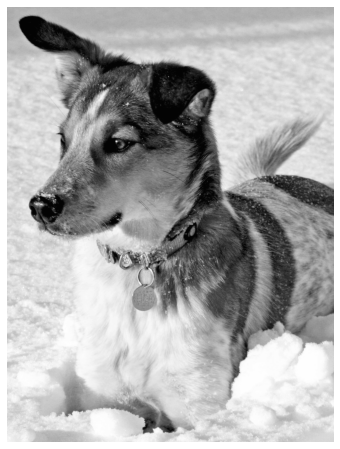

In [16]:
#We approximate dog.jpg using the 3 ranks that we found

Approx1 = U[:,:varRank99]@ S[0:varRank99, :varRank99] @VT[:varRank99,:]
img = plt.imshow(Approx1, cmap = 'gray')
plt.axis('off')
plt.show()

Approx2 = U[:,:frobRank99]@ S[0:frobRank99, :frobRank99] @VT[:frobRank99,:]
img = plt.imshow(Approx2, cmap = 'gray')
plt.axis('off')
plt.show()

Approx3 = U[:,:sumRank99]@ S[0:sumRank99, :sumRank99] @VT[:sumRank99,:]
img = plt.imshow(Approx3, cmap = 'gray')
plt.axis('off')

plt.show()